In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


Importamos el dataset


In [2]:
df = pd.read_csv("personality.csv")
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


Describimos y analizamos el dataset

In [3]:
df.shape

(140, 8)

In [4]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [7]:
df.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

Limpiamos los datos a variables cuantitativas

In [70]:
df1=df.iloc[:,1:7]
df1.head()

,op,co,ex,ag,ne,wordcount
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645


In [71]:
df1.columns

Index(['op', 'co', 'ex', 'ag', 'ne', 'wordcount'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe742a4ed0>,
      dtype=object)

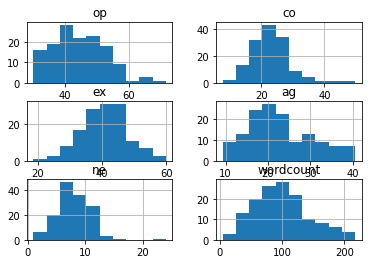

In [72]:
df1.hist()

Normalizamos los datos


In [73]:
scaler = MinMaxScaler()

In [74]:
scale =scaler.fit_transform(df1)


In [84]:
df_scale = pd.DataFrame(scale, columns = df1.columns)
df_scale

,op,co,ex,ag,ne,wordcount
0,0.102638,0.485725,0.565391,0.641501,0.383967,0.151175
1,0.359116,0.303292,0.467902,0.478723,0.406663,0.347735
2,0.281061,0.141023,0.493696,0.810161,0.340190,0.208518
3,0.248507,0.180081,0.817966,0.696232,0.174393,0.355544
4,0.159427,0.282146,0.725415,0.698045,0.273474,0.198168
...,...,...,...,...,...,...
135,0.133145,0.341772,0.491386,0.713567,0.486791,0.200418
136,0.046549,0.181027,0.725471,0.984439,0.467764,0.200515
137,1.000000,0.110961,0.215837,0.312930,0.096379,0.326569
138,0.516295,0.434531,0.432075,0.438089,0.272559,0.535391


Aplicamos PCA

In [139]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [140]:
pca = PCA()
pca.fit(preprocessing.scale(df1))

PCA()

In [87]:
pca.fit(df_scale)

PCA()

In [142]:
pca = PCA(n_components=2)
pca.fit(preprocessing.scale(df_scale))

PCA(n_components=2)

In [88]:
pca.explained_variance_

array([0.111063  , 0.03731464, 0.02367315, 0.01903433, 0.01250286,
       0.00907381])

In [89]:
pca.explained_variance_ratio_

array([0.5222518 , 0.17546472, 0.11131832, 0.08950516, 0.0587922 ,
       0.0426678 ])

In [90]:
components = np.arange(pca.n_components_) + 1
variance = pca.explained_variance_ratio_

In [154]:
pca_summary_df = pd.DataFrame({"Proporción de la varianza": pca.explained_variance_ratio_, "Propoción acumulada":np.cumsum(pca.explained_variance_ratio_)})
pca_summary_df

,Proporción de la varianza,Propoción acumulada
0,0.440109,0.440109
1,0.210921,0.651030


In [157]:
pca_summary_df = pca_summary_df.transpose()
pca_summary_df

,Proporción de la varianza,Propoción acumulada
PC1,0.440109,0.440109
PC2,0.210921,0.651030


In [158]:
pca_summary_df.columns = ["PC" + str(pc) for pc in range(1, len(pca_summary_df.columns) + 1)]
pca_summary_df

,PC1,PC2
PC1,0.440109,0.440109
PC2,0.210921,0.651030


Podemos observar que las variables 1 'op' y la variable 2 'co' son las más significativas


In [93]:
pca_components_df = pd.DataFrame(pca.components_.transpose(),
                                columns=components,
                                index=df1.columns)

In [94]:
pca_components_df

,1,2,3,4,5,6
op,0.484299,0.420821,-0.326657,0.348770,0.178034,-0.572995
co,0.219794,-0.203610,0.400867,-0.092680,-0.719639,-0.472302
ex,-0.362414,-0.022745,-0.515507,-0.645528,-0.025982,-0.430127
ag,-0.668259,-0.196232,-0.074479,0.643643,-0.076975,-0.298620
ne,-0.000326,-0.319884,0.512423,-0.150084,0.665511,-0.411906
wordcount,0.373135,-0.800064,-0.445790,0.127525,0.030317,0.068971


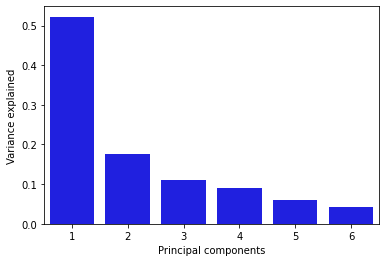

In [96]:
sns.barplot(x=components, y=variance, color="b")
plt.xlabel("Principal components")
plt.ylabel("Variance explained")
plt.show()

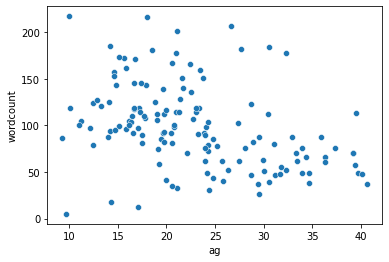

In [97]:
sns.scatterplot(x='ag', y= 'wordcount',data=df1)

Nuevo dataframe con sólo las dos variables ag y wordcount




In [102]:
df2=df.iloc[:, [4,6]]
df2.head()

,ag,wordcount
0,29.370315,37.0945
1,24.279098,78.7970
2,34.645521,49.2604
3,31.082154,80.4538
4,31.138871,47.0645


In [103]:
km = KMeans(n_clusters=2)

In [117]:
km.fit_predict(df2)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

In [118]:
km.cluster_centers_

array([[ 2.48766906e+01,  7.05649919e+01, -2.77555756e-16],
       [ 1.97999726e+01,  1.43547748e+02,  1.00000000e+00]])

In [119]:
df2["Clusters"] = km.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
df2.columns

Index(['ag', 'wordcount', 'Clusters'], dtype='object')

Podemos observar 2 clusters con el siguiente scatterplot y utilizaremos el metodo del codo para comprobarlo


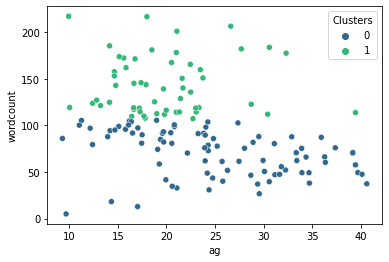

In [121]:
sns.scatterplot(x='ag', y= 'wordcount',hue='Clusters',data=df2, palette="viridis")

In [128]:
K =range (2,10)
inertias =[]
for i in K:
  kmeans =KMeans(n_clusters=i)
  kmeans.fit(df2)
  inertias. append(kmeans.inertia_)

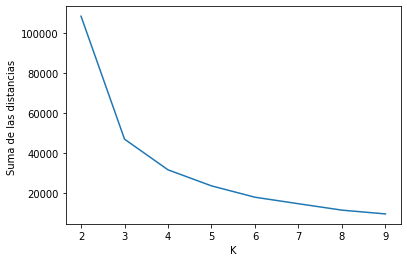

In [129]:
plt.plot(K, inertias)
plt.xlabel ("K")
plt.ylabel("Suma de las distancias ")
plt.show()

Gracias al metodo del codo podemos concretar que 3 Clusters son los necesarios para nuestro analisis


In [130]:
km = KMeans(n_clusters=3)

In [132]:
km.fit_predict(df2)

array([2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 1,
       2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0,
       0, 0, 0, 2, 2, 2, 0, 0], dtype=int32)

In [133]:
km.cluster_centers_

array([[ 2.00107639e+01,  1.01942844e+02,  3.93939394e-01],
       [ 1.98160287e+01,  1.68112132e+02,  1.00000000e+00],
       [ 2.89790151e+01,  5.18434848e+01, -2.22044605e-16]])

In [134]:
df2["Clusters"] = km.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


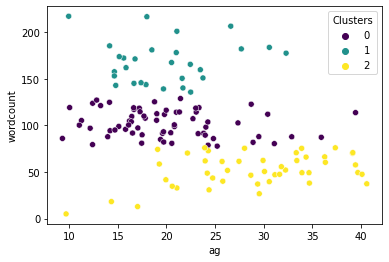

In [135]:
sns.scatterplot(x='ag', y= 'wordcount',hue='Clusters',data=df2, palette="viridis")

In [149]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [152]:
linkage_data = linkage(df2, method='centroid', metric='euclidean')

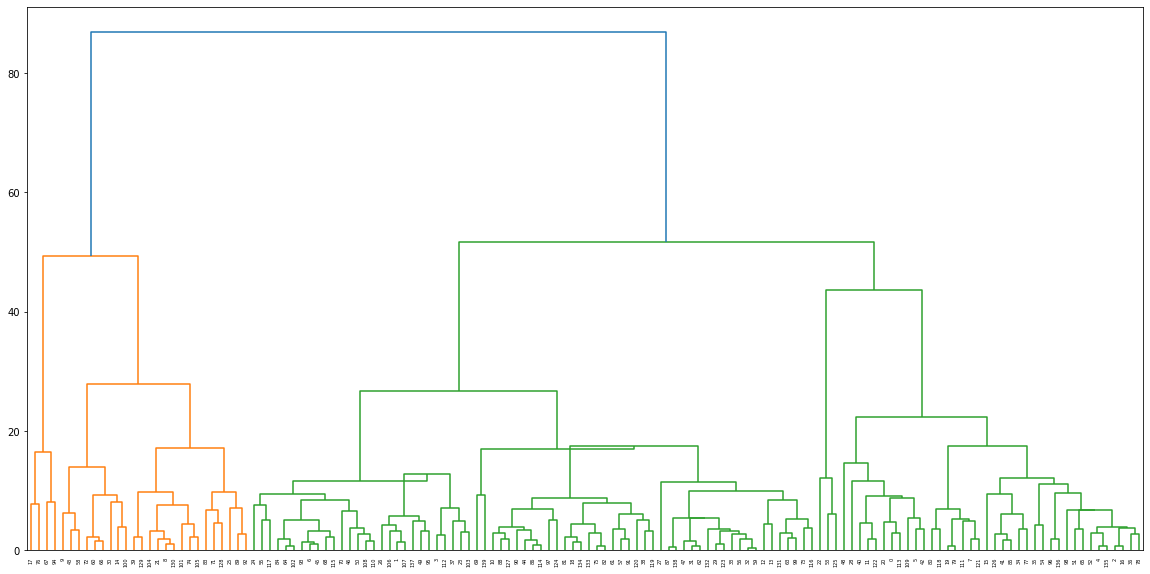

In [153]:
plt.figure(figsize=(20,10))
dendrogram(linkage_data)
plt.show()

¿Por qué es necesario normalizar los datos?


*  Al  normalizar los datos podemos tener una comparación entre variables correcta, ya que tenemos el mismo rango




¿Cuántos componentes se usaron y que variables tienen mayor importancia?
2 componentes y los que más importancia tienen son

1.   AG
2.   Wordcount




¿Qué información da la gráfica "Elbow plot"?


*   Nos da la cantidad exacta de clusters que debemos usar para usar Kmeans




¿Crees que los resultados serían diferentes si descartas variables?


*   Sí, ya que al descartar varibales la varianza cambiara pada cada variable



Interpreta por lo menos 2 clusters explicando similitudes o diferencias de personalidad.

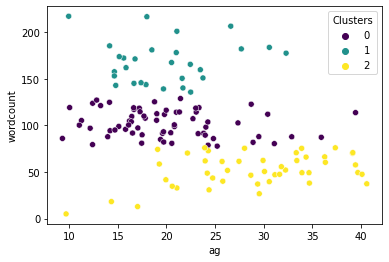

In [148]:
sns.scatterplot(x='ag', y= 'wordcount',hue='Clusters',data=df2, palette="viridis")



*  Podemos ver en el cluster amarillo que es coincidencia que mientras menos palabras más agradables es el usuario

*   Por otro lado el cluster morado podemos interpretar que alrededor de 100 palabras se cuenta con un grado de agradación de la mitad




